In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Goal
- determine a relationship (if one exists) between GDP and Life Expectancy. 

In [2]:
df = pd.read_csv('all_data.csv')
df = df.rename({'Life expectancy at birth (years)':'Life_Expectancy'}, axis =1)
df['Country'] = df['Country'].replace({'United States of America':'USA'})

df.head()

,Country,Year,Life_Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# looking for any missing or misspelled data. 
print(df.info())
print(f' Countries: {df.Country.unique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
 Countries: ['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


- There doesn't appear to be any mistakes in the data types nor in the Country 

In [4]:

print(f'Years: {df.Year.value_counts()}')


Years: 2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64


- doesn't appear to have any mislabeled years. 

### Univariate Analysis

In [5]:
columns = ['Life_Expectancy', 'GDP']

for col in columns: 
    print(f'{col}\n{df[col].describe()}\n')

Life_Expectancy
count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life_Expectancy, dtype: float64

GDP
count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64



- Notice that the standard deviation is higher than the mean.  This indicates that the outliers are skewing the standard deviation heavily. 

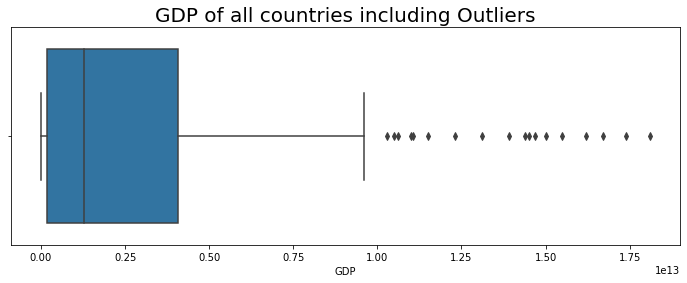

In [6]:
plt.figure(figsize = (12,4))
sns.boxplot(data = df, x = 'GDP')
plt.title('GDP of all countries including Outliers', fontdict = {'fontsize':20})
plt.show()

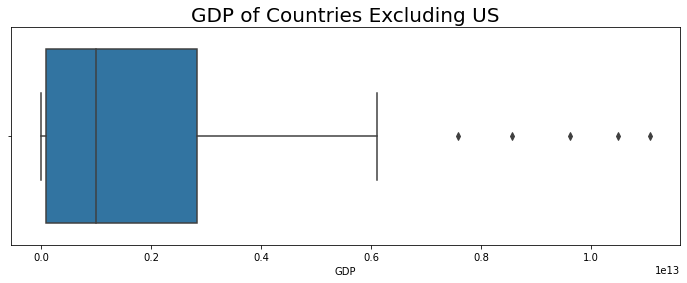

In [7]:
plt.figure(figsize = (12,4))
sns.boxplot(data = df[df['Country']!= 'USA'], x = 'GDP')
plt.title('GDP of Countries Excluding US', fontdict = {'fontsize':20})
plt.show()

- It appears that most of the outliers in the first boxplot are United States GDP observations for different years. 
- Does a similar phenomena happen for life expectancy? 

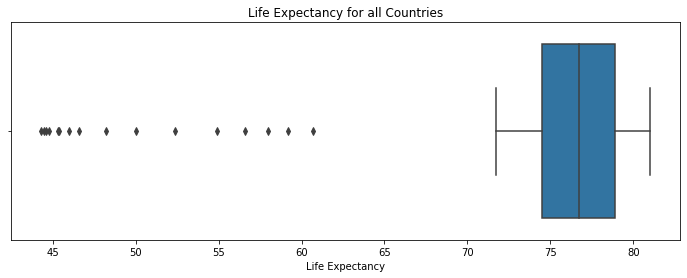

In [8]:
plt.figure(figsize = (12,4))
sns.boxplot(data = df, x = 'Life_Expectancy')
plt.title('Life Expectancy for all Countries')
plt.xlabel('Life Expectancy')
plt.show()

- here we see many outliers on the low side. 
- This is primarily due to Zimbabwe. 

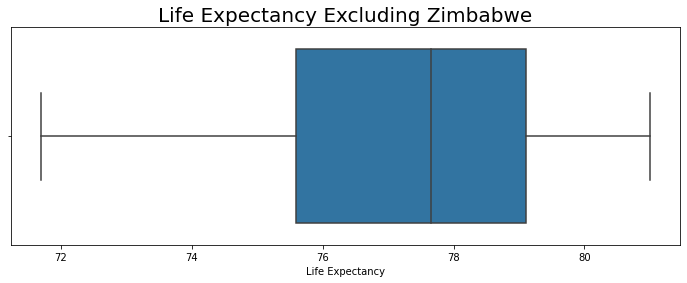

In [9]:
plt.figure(figsize = (12,4))
sns.boxplot(data = df[df['Country']!='Zimbabwe'], x = 'Life_Expectancy')
plt.title('Life Expectancy Excluding Zimbabwe', fontdict = {'fontsize':20})
plt.xlabel('Life Expectancy')
plt.show()

- here we don't see any outliers.
- Assuming there is a correlation between GDP and Life Expectancy, this will indicate that once a country reaches a certain point, the relationship starts to flatten out. (here life expectancy will reach a soft upper bound.)

### Looking at the relationship between Life Expectancy and GDP by Country

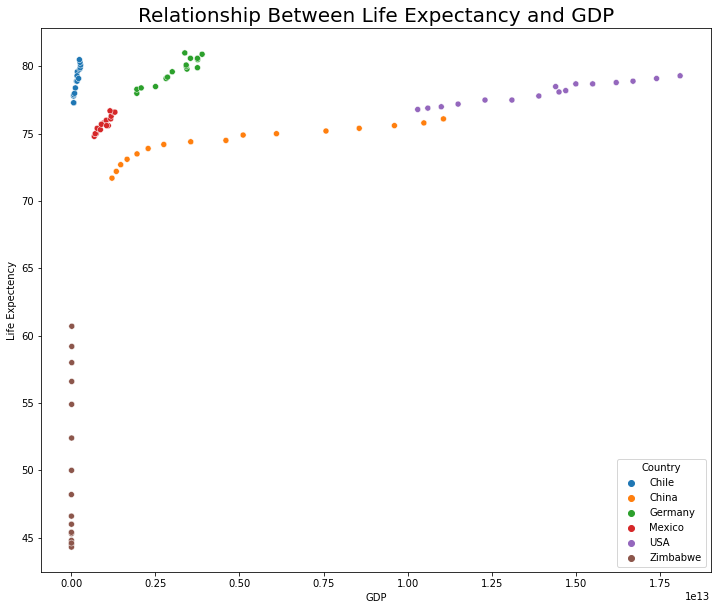

In [10]:
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, y = 'Life_Expectancy', x = 'GDP', hue = 'Country')
plt.title('Relationship Between Life Expectancy and GDP', fontdict = {'fontsize':20})
plt.ylabel('Life Expectency')
plt.show()


- a very clear relationship between GDP and life expectancy.  
- The clusters of each country indicate that GDP isn't an accurate predictor.
- If we isolate the GDP and Life Expectancy relationship to a single country, we see an incredibly strong correltation. However, we also see that these groups are clustered where some countries withe lower gdp have a higher life expectancy.  Other factors are involved to account for this.  
    - potential factors may include genetics, policies, medical breakthroughs, etc.  
        - I will note that if medical breakthroughs are a factor here there may be more more correlation with them for both GDP and Life Expectancy.  

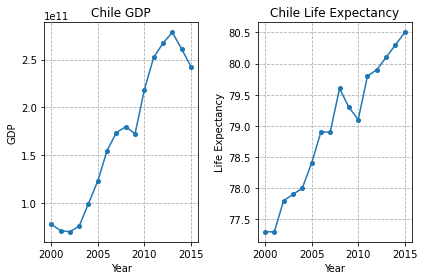

<Figure size 432x288 with 0 Axes>

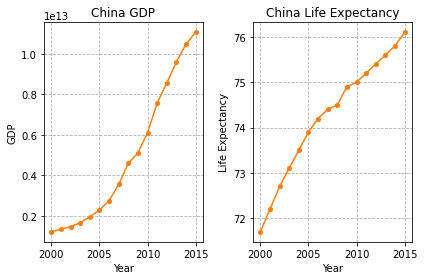

<Figure size 432x288 with 0 Axes>

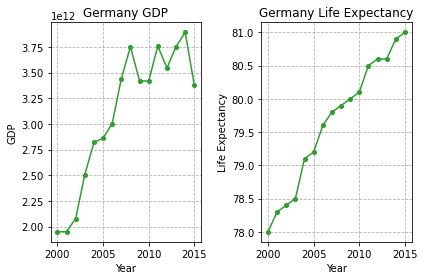

<Figure size 432x288 with 0 Axes>

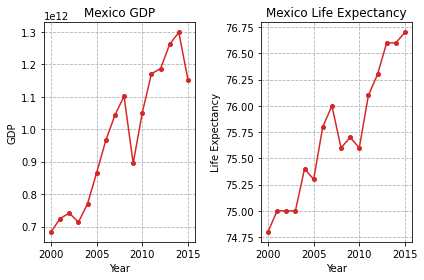

<Figure size 432x288 with 0 Axes>

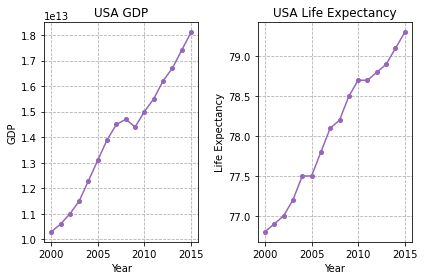

<Figure size 432x288 with 0 Axes>

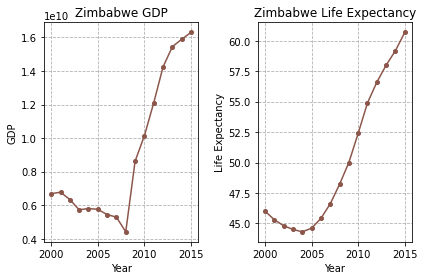

<Figure size 432x288 with 0 Axes>

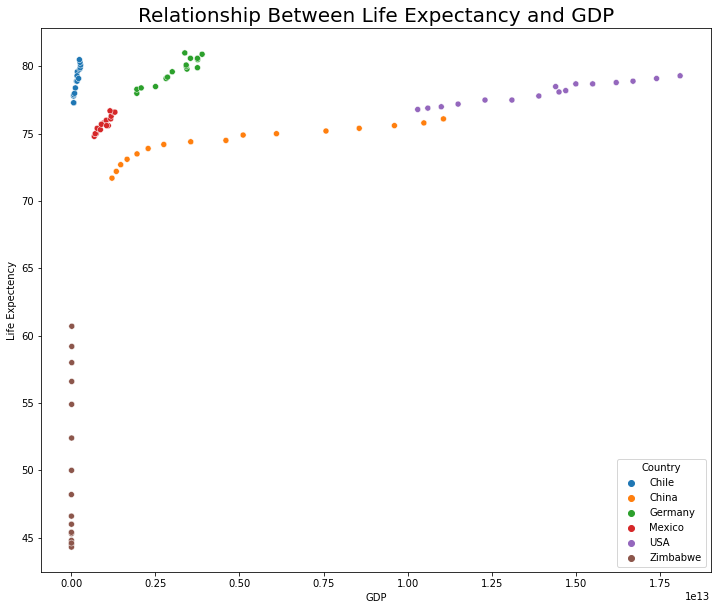

In [11]:
# lets now look at a time lapse. This range of years does cover the Great Recession, and perhaps we may see a slight decrease in life expectancy 

colors = {'Chile':'#1f77b4', 'China':'#ff7f0e', 'Germany':'#2ca02c', 'Mexico':'#d62728', 'USA':'#9467bd', 'Zimbabwe':'#8c564b'}
columns = df.Country.unique()
df_country = {}
for country in columns: 
    df_country[country] = df[df.Country == country]



for country in columns:
    #plt.figure(figsize = (10,10))
    fig, (ax1,ax2) = plt.subplots(1,2)
    country_data = df_country[country]
    
    ax1.plot(country_data.Year,country_data.GDP, color = colors[country], marker = 'o', markersize = 4)
    ax1.grid(linestyle = '--')
    ax1.set_xlabel(f'Year')
    ax1.set_ylabel(f'GDP')
    ax1.set_title(f'{country} GDP')
    
    
    ax2.plot(country_data.Year,country_data.Life_Expectancy, color = colors[country], marker = 'o', markersize = 4)
    ax2.grid(linestyle = '--')
    ax2.set_xlabel(f'Year')
    ax2.set_ylabel(f'Life Expectancy')
    ax2.set_title(f'{country} Life Expectancy')
    
    fig.tight_layout()
    plt.show()
    plt.clf()
    
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, y = 'Life_Expectancy', x = 'GDP', hue = 'Country', palette = colors)
plt.title('Relationship Between Life Expectancy and GDP', fontdict = {'fontsize':20})
plt.ylabel('Life Expectency')
plt.show()

- We can see a clear correlation between GDP and Life Expectancy. 
    - Note that this could be a direct cause and effect, but it could also mean that there is another variable, that is directly effecting both of these variables. 
- We can see some life expectancies stay on an upward trajectory even though the GDP shows some instability, while others have a more instability in the life expectancy, than the GDP.  It's hard to determine which is more likely unless we have data from more countries. 
- I would need more countries to verify this, but it seems like there is a slightly closer correlation for countries with low GDP (<200,000,000,000). 